In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-25 06:39:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.12MB/s    in 53s     

2020-07-25 06:40:43 (5.83 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os

In [4]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir('/tmp/rockpaperscissors/')

['rps-cv-images', 'paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']

In [6]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [7]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [8]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [9]:
base_dir = '/tmp/rockpaperscissors'

#buat train directory
train_dir = os.path.join(base_dir, 'train')

#buat validation directory
validation_dir = os.path.join(base_dir, 'val')

In [10]:
#cek apakah directory train & validation exists
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

In [11]:
rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')

#memecah directory menjadi train dan validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4 )
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4 )
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [12]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [13]:
if not os.path.exists(train_rock):
    os.mkdir(train_rock)
if not os.path.exists(train_paper):
    os.mkdir(train_paper)
if not os.path.exists(train_scissors):
    os.mkdir(train_scissors)

if not os.path.exists(val_rock):
    os.mkdir(val_rock)
if not os.path.exists(val_paper):
    os.mkdir(val_paper)
if not os.path.exists(val_scissors):
    os.mkdir(val_scissors)

In [14]:
import shutil

#copy data train ke directory baru
for i in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

#copy data validation ke directory baru
for i in val_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [15]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))


435

In [16]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))


427

In [17]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [18]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))


291

In [19]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))


285

In [20]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [21]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range=0.2,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,150),
    shuffle=True,
    batch_size=32,
    #subset='training',
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(100,150),
    # shuffle=False,
    batch_size=32,
    #subset='validation',
    class_mode='categorical',
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
)

Epoch 1/20
25/25 - 5s - loss: 1.0710 - accuracy: 0.4187 - val_loss: 1.0013 - val_accuracy: 0.4625
Epoch 2/20
25/25 - 5s - loss: 0.7487 - accuracy: 0.6888 - val_loss: 0.5422 - val_accuracy: 0.7937
Epoch 3/20
25/25 - 5s - loss: 0.4225 - accuracy: 0.8525 - val_loss: 0.2498 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 5s - loss: 0.2848 - accuracy: 0.8875 - val_loss: 0.3241 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 5s - loss: 0.2615 - accuracy: 0.9175 - val_loss: 0.2381 - val_accuracy: 0.9187
Epoch 6/20
25/25 - 5s - loss: 0.2118 - accuracy: 0.9312 - val_loss: 0.1916 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 5s - loss: 0.1974 - accuracy: 0.9287 - val_loss: 0.2704 - val_accuracy: 0.8875
Epoch 8/20
25/25 - 5s - loss: 0.2058 - accuracy: 0.9300 - val_loss: 0.1032 - val_accuracy: 0.9750
Epoch 9/20
25/25 - 5s - loss: 0.1458 - accuracy: 0.9613 - val_loss: 0.1266 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 5s - loss: 0.1578 - accuracy: 0.9463 - val_loss: 0.1205 - val_accuracy: 0.9625
Epoch 11/20
25/25 -

Using TensorFlow backend.


Saving rock.png to rock.png
rock.png
rock


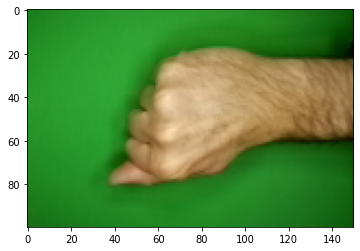

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    elif classes[0][2] == 1:
        print('scissors')